In [5]:
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = load_dataset("ruanchaves/b2w-reviews01", split='train')
df = pd.DataFrame(dataset)
df.to_csv('./datasets/dataset.csv', index=False)

Using the latest cached version of the dataset since ruanchaves/b2w-reviews01 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Isabe\.cache\huggingface\datasets\ruanchaves___b2w-reviews01\default\1.0.0\4c0b2776d46015c384a6b28b16014a6c82a65587 (last modified on Wed Sep  4 16:23:57 2024).


Separando 20% do dataset original para testes:

In [3]:
def separar_dataset(dataset, porcentagem_teste, nome_arquivo_teste):

  # Calcula o número de linhas para o conjunto de teste
  num_linhas_teste = int(len(dataset) * porcentagem_teste)

  # Embaralha o índice do DataFrame
  dataset = dataset.sample(frac=1).reset_index(drop=True)

  # Separa o conjunto de teste
  teste = dataset.iloc[:num_linhas_teste]

  # Separa o conjunto de treinamento
  treinamento = dataset.iloc[num_linhas_teste:]

  # Salva o conjunto de teste em um arquivo CSV
  teste.to_csv(nome_arquivo_teste, index=False)

  return treinamento, teste

# Carregar o dataset (substitua por sua forma de carregar o dataset)
df = pd.read_csv('./datasets/dataset.csv')

# Separar 20% dos dados para teste e salvar em um arquivo CSV
treinamento, teste = separar_dataset(df, 0.2, './datasets/dataset_teste.csv')

C:\Users\Isabe\AppData\Local\Temp\ipykernel_8256\1948902989.py:21: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/dataset.csv')


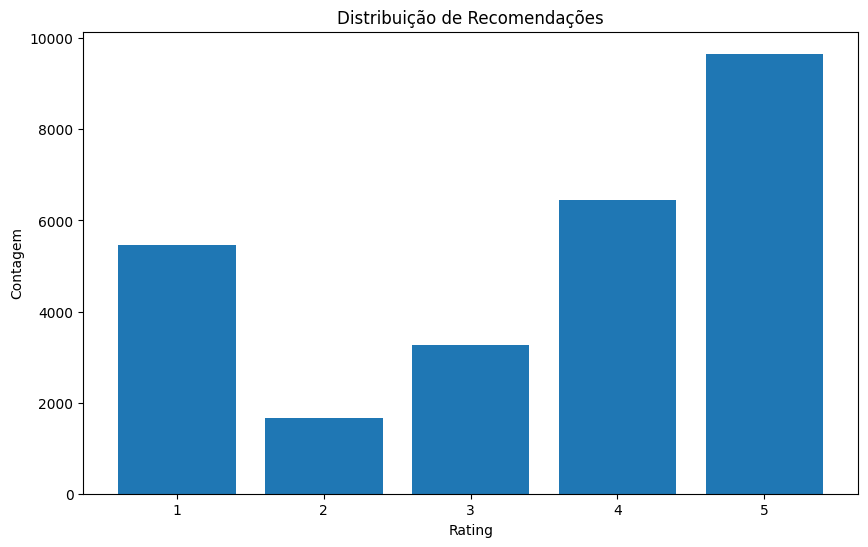

In [6]:
df = pd.read_csv('./datasets/dataset_teste.csv')

# Obter os valores e contagem
values = df['overall_rating'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(values.index, values.values)

# Configurar os labels e título
plt.xlabel('Rating')
plt.ylabel('Contagem')
plt.title('Distribuição de Recomendações')

# Exibir o gráfico
plt.show()